# Nice Ride MN Exploratory Data Analysis

description...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set()

In [2]:
# Load data
stations = pd.read_csv('Nice_Ride_2017_Station_Locations.csv')
trips = pd.read_csv('Nice_ride_trip_history_2017_season.csv')

/panfs/roc/msisoft/anaconda/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Show some of the stations data
stations.head()

,Number,Name,Latitude,Longitude,Total docks
0,30000,100 Main Street SE,44.984892,-93.256551,27
1,30001,25th Street & 33rd Ave S,44.957341,-93.223374,15
2,30002,Riverside Ave & 23rd Ave S,44.967115,-93.240149,15
3,30003,Plymouth Ave N & N Oliver Ave,44.991412,-93.306269,15
4,30004,11th Street & Hennepin,44.975340,-93.278690,23


Notes: 
- last entry in stations['Number'] is NRWH instead of a number!
- Lat, lon, total docks are OK

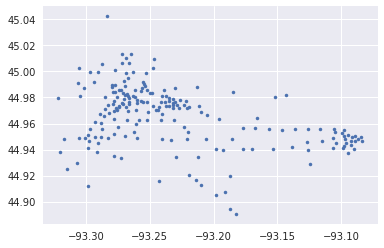

In [4]:
plt.plot(stations.Longitude, stations.Latitude, '.')
plt.show()

In [5]:
# Show some of the trip data
trips.head()

,Start date,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds)
0,11/5/2017 21:45,Hennepin Ave & S Washington Ave,30184,11/5/2017 22:02,Logan Park,30104,Member,1048
1,11/5/2017 21:45,Broadway Street N & 4th Street E,30122,11/5/2017 22:26,Broadway Street N & 4th Street E,30122,Member,2513
2,11/5/2017 21:43,Dale Street & Grand Ave.,30106,11/5/2017 22:13,N Milton Street & Summit Ave,30101,Member,1817
3,11/5/2017 21:41,Weisman Art Museum,30183,11/5/2017 22:05,22nd Ave S & Franklin Ave,30014,Casual,1399
4,11/5/2017 21:38,South 2nd Street & 3rd Ave S,30030,11/5/2017 21:44,6th Ave SE & University Ave,30088,Member,370


In [6]:
dir(trips)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',


In [7]:
# Get info about each column
for col in trips:
    print('\n',col,'\n',trips[col].describe())


 Start date 
 count              460718
unique             171626
top       6/16/2017 12:31
freq                   20
Name: Start date, dtype: object

 Start station 
 count                       460718
unique                         202
top       Lake Street & Knox Ave S
freq                         10747
Name: Start station, dtype: object

 Start station number 
 count     460718
unique       401
top        30115
freq        7350
Name: Start station number, dtype: object

 End date 
 count             460718
unique            170180
top       9/9/2017 14:58
freq                  25
Name: End date, dtype: object

 End station 
 count                       460718
unique                         202
top       Lake Street & Knox Ave S
freq                         11658
Name: End station, dtype: object

 End station number 
 count     460718
unique       401
top        30158
freq        7769
Name: End station number, dtype: object

 Account type 
 count     460718
unique         3
top    

In [8]:
# Convert datatypes
for col in ['End date', 'Start date']:
    trips[col] = pd.to_datetime(trips[col])

In [9]:
# Info about memberships
trips['Account type'].value_counts()

Member     290070
Casual     170646
Inconnu         2
Name: Account type, dtype: int64

# Notes / TODO

Data cleaning first

Use KeplerGL maybe to visualize:
- Station locations and spots per station
- Ride density to and from stations, and vs time
- Flow (overall)
- Flow to vs from
- Flow to and from by day/time
  - Eg to/from downtown on a weekday morning vs night
  - Or to/from the lakes/parks weekday vs weekend
  
Compute # bikes at each station? If that's not provided
- Then visualize bike availability vs station

Does the distribution of rides from a each station match the distribution of available bikes at each station? (This will change over time, see if there's a time when it's especially bad)

Does the distribution of rides to each station match the distribution of empty slots (again will change over time)

Is there a difference in the bike patterns between people with a membership vs people without one?
- Compute the transition (or trip) probability matrix for members and separately for non members
- Does it significantly differ?
- Or could bootstrap to get distributions for each trip, compute roc to get prob members take that trip more often (don't bother with significance testing unless there's one or two you are really interested in...)
- Then find the M best stations to put ads at (the M stations which maximize the probability that a person with a riding pattern similar to people with memberships will see it)
- Mention that this assumes that people who have bike patterns that are similar to those people with memberships are more likely to actually get memberships. And say that in fact what you would really want to do is do a/b testing or Bandit algorithm.

How does riding activity depend on the weather?
 -Temperature, cloudy, and rain
 
Is there a seasonal dependence in riding activity independent of the weather?
- Look at residuals over season after regressing out weather
- The idea is: do people just not wanna ride bikes as much in the fall even if it's nice out?
